# Tackling the Health Crises in Africa
People dying from lack of medical resources
## Introduction
The lack of access to adequate medical resources and facilities have led to the significant number of deaths. Some of these deaths could have been avoided by timely access to a medical professional or close proximity of hospitals.

Health systems across Africa are underfunded and understaffed. Less than half of African citizens (52%) about 615 million people have access to the health care they need, the quality of health services across the continent is generally poor, and family planning needs of half the continent’s women and girls are unmet.

**Let’s focus on Africa in this dataset**

You are required to provide solutions to the health challenges, especially in Africa. Ensure that you allow all your creative self to shine through and remember, Africa looks up to you for a solution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# suppressing SettingWithCopyWarning
pd.options.mode.chained_assignment = None # default='warn'

plt.style.use('seaborn-dark-palette')
%matplotlib inline

## Data Wrangling

In [2]:
# load data
worldCountries = pd.read_excel('./data/World Healthcaredata.xlsx', sheet_name=0)
causesofDeath = pd.read_excel('./data/World Healthcaredata.xlsx', sheet_name=1, parse_dates=['Year'])
ageGroupDeaths = pd.read_excel('./data/World Healthcaredata.xlsx', sheet_name=2, parse_dates=['Year'])
doctorsPerPopulation = pd.read_excel('./data/World Healthcaredata.xlsx', sheet_name=3, parse_dates=['Year'])
healthExpenditure = pd.read_excel('./data/World Healthcaredata.xlsx', sheet_name=4, parse_dates=['Year'])
africanCountries = pd.read_excel('./data/World Healthcaredata.xlsx', sheet_name=5)
worldPopulation = pd.read_csv('./data/5. World Population.csv')

In [3]:
worldCountries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             254 non-null    object 
 1   Continent_Code             212 non-null    object 
 2   Country_Name               254 non-null    object 
 3   Two_Letter_Country_Code    253 non-null    object 
 4   Three_Letter_Country_Code  254 non-null    object 
 5   Country_Number             250 non-null    float64
dtypes: float64(1), object(5)
memory usage: 12.0+ KB


In [4]:
causesofDeath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152733 entries, 0 to 152732
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Entity      152733 non-null  object        
 1   Code        152733 non-null  object        
 2   Year        152733 non-null  datetime64[ns]
 3   Causes      152733 non-null  object        
 4   Case_Count  152733 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.8+ MB


In [5]:
causesofDeath.sample(6)

,Entity,Code,Year,Causes,Case_Count
77160,Niue,NIU,2017-01-01,Lower respiratory infections,1
121418,Qatar,QAT,2010-01-01,Protein,0
96618,Eswatini,SWZ,2004-01-01,Neoplasms,903
105650,Mauritius,MUS,2013-01-01,Diabetes mellitus,1685
136511,Slovakia,SVK,2013-01-01,Cirrhosis and other chronic liver diseases,1690
88343,Canada,CAN,2019-01-01,Diarrheal diseases,1742


In [6]:
ageGroupDeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34200 entries, 0 to 34199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Entity       34200 non-null  object        
 1   Code         30750 non-null  object        
 2   Year         34200 non-null  datetime64[ns]
 3   Age_Group    34200 non-null  object        
 4   Death_Count  34200 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.3+ MB


Convert Age_Group to categorical data type

In [7]:
ageGroupDeaths.Age_Group.unique()

array(['70+ years', '50-69 years', '15-49 years', '5-14 years', 'Under 5'],
      dtype=object)

In [8]:
ageGroupDeaths['Age_Group'] = ageGroupDeaths.Age_Group.str.replace(pat='Under 5', repl='Under 5 years')

In [9]:
# order in increasing age
ageRange = ['Under 5 years', '5-14 years', '15-49 years', '50-69 years', '70+ years']

# creating the CategoricalDtype
ageRange_class = pd.api.types.CategoricalDtype(categories=ageRange, ordered=True)

# applying convertion to variables in dataframe
ageGroupDeaths['Age_Group'] = ageGroupDeaths['Age_Group'].astype(ageRange_class)

In [10]:
ageGroupDeaths.Age_Group.unique()

['70+ years', '50-69 years', '15-49 years', '5-14 years', 'Under 5 years']
Categories (5, object): ['Under 5 years' < '5-14 years' < '15-49 years' < '50-69 years' < '70+ years']

In [11]:
ageGroupDeaths = ageGroupDeaths.query('Year >= 2000 & Year < 2020')

In [12]:
doctorsPerPopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   IndicatorCode       11508 non-null  object        
 1   Indicator           11508 non-null  object        
 2   ParentLocationCode  11508 non-null  object        
 3   ParentLocation      11508 non-null  object        
 4   ThreeLocCode        11508 non-null  object        
 5   Location            11508 non-null  object        
 6   Year                11508 non-null  datetime64[ns]
 7   FactValueNumeric    11508 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 719.4+ KB


In [13]:
doctorsPerPopulation = doctorsPerPopulation.query('Year >= 2000 & Year < 2020')

In [14]:
healthExpenditure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Country Name                   5852 non-null   object        
 1   Country_Code                   5852 non-null   object        
 2   Year                           5852 non-null   datetime64[ns]
 3   Health Expenditure (% of GDP)  4694 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 183.0+ KB


In [15]:
healthExpenditure = healthExpenditure.query('Year >= 2000 & Year < 2020')

In [16]:
worldPopulation = worldPopulation.query('Year >= 2000 & Year < 2020')

In [17]:
worldPopulation['Year'] = pd.to_datetime(worldPopulation.Year, format='%Y')

## Exploratory Analysis
Let's use data from 2000 upwards

**Case Count**
* What's the distribution of 'Case_Count' for each continent (How does Africa compare to other contries)
  * Let's see a barchart (showing rank) ~~and a linechart (showing rise/fall in count each year)~~
* What are the best and worst performing countries in Africa (account for Countries with more than 10 years of data)
  * Use a barchart to show the highest and lowest ranks
* How does Nigeria compare to the Top 4
  * Use a line chart to show progress over time. Facet with common axes.

> **NARROW DOWN TO AFRICA**

**Death Causes**
* What causes are responsible for most of the deaths in Africa?
  * A barchart showing rank of causes for deaths in Africa (*proportion*)
  * Hightlight the top 5 and add percentages
* How do the top causes vary with time in Nigeria? 
  * Line graph showing just the progress of the top causes
  * Note use proportions per cause for each year i.e. How much did a particular cause contribute the death count each year?

#### What proportion of the world's population died due to health related issues?

There are some strange records in `causesofDeath` (World', 'G20', 'World Bank Lower Middle Income', 'World Bank Upper Middle Income', 'East Asia & Pacific (WB)', etc). Let's merge with the `worldCountries` dataset, removing unnecessary records.

In [18]:
causesofDeath_agg_sum = causesofDeath.groupby('Entity').sum()

In [19]:
causesofDeath_agg_sum.sort_values('Case_Count', ascending=False).head(25).index

Index(['World', 'G20', 'World Bank Lower Middle Income',
       'World Bank Upper Middle Income', 'East Asia & Pacific (WB)',
       'Western Pacific Region (WHO)', 'South-East Asia Region (WHO)',
       'South Asia (WB)', 'OECD Countries', 'World Bank High Income',
       'European Region (WHO)', 'Europe & Central Asia (WB)', 'China', 'India',
       'Sub-Saharan Africa (WB)', 'African Region (WHO)',
       'Region of the Americas (WHO)', 'World Bank Low Income',
       'Eastern Mediterranean Region (WHO)', 'Latin America & Caribbean (WB)',
       'North America (WB)', 'United States', 'Russia',
       'Middle East & North Africa (WB)', 'Nigeria'],
      dtype='object', name='Entity')

In [20]:
worldCountries.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,Afghanistan,AF,AFG,4.0
1,Europe,EU,Albania,AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,Algeria,DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [21]:
causesofDeath.head()

,Entity,Code,Year,Causes,Case_Count
0,Afghanistan,AFG,2007-01-01,Meningitis,2933
1,Afghanistan,AFG,2008-01-01,Meningitis,2731
2,Afghanistan,AFG,2009-01-01,Meningitis,2460
3,Afghanistan,AFG,2011-01-01,Meningitis,2327
4,Afghanistan,AFG,2012-01-01,Meningitis,2254


In [22]:
causesofDeath_merge = pd.merge(left=causesofDeath, right=worldCountries, how='inner', left_on='Code', right_on='Three_Letter_Country_Code')

In [23]:
causesofDeath_merge.groupby('Entity').sum().sort_values('Case_Count', ascending=False).head(25).index

Index(['China', 'India', 'United States', 'Russia', 'Nigeria', 'Indonesia',
       'Pakistan', 'Japan', 'Brazil', 'Germany', 'Bangladesh', 'Ethiopia',
       'Ukraine', 'United Kingdom', 'Italy', 'Democratic Republic of Congo',
       'France', 'Mexico', 'South Africa', 'Egypt', 'Vietnam', 'Myanmar',
       'Philippines', 'Tanzania', 'Spain'],
      dtype='object', name='Entity')

In [24]:
causesofDeath_merge = causesofDeath_merge.drop(labels=['Entity', 'Country_Number'], axis=1)

In [25]:
causesofDeath_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128940 entries, 0 to 128939
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Code                       128940 non-null  object        
 1   Year                       128940 non-null  datetime64[ns]
 2   Causes                     128940 non-null  object        
 3   Case_Count                 128940 non-null  int64         
 4   Continent_Name             128940 non-null  object        
 5   Continent_Code             111867 non-null  object        
 6   Country_Name               128940 non-null  object        
 7   Two_Letter_Country_Code    128310 non-null  object        
 8   Three_Letter_Country_Code  128940 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 9.8+ MB


In [26]:
causesofDeath_merge = causesofDeath_merge.iloc[:,[6,1,2,3,7,8,4,5]]

In [27]:
causesofDeath_merge.head()

,Country_Name,Year,Causes,Case_Count,Two_Letter_Country_Code,Three_Letter_Country_Code,Continent_Name,Continent_Code
0,Afghanistan,2007-01-01,Meningitis,2933,AF,AFG,Asia,AS
1,Afghanistan,2008-01-01,Meningitis,2731,AF,AFG,Asia,AS
2,Afghanistan,2009-01-01,Meningitis,2460,AF,AFG,Asia,AS
3,Afghanistan,2011-01-01,Meningitis,2327,AF,AFG,Asia,AS
4,Afghanistan,2012-01-01,Meningitis,2254,AF,AFG,Asia,AS


Let's see only use data from 2000 upwards.

In [28]:
causesofDeath_merge = causesofDeath_merge[causesofDeath_merge.Year >= '2000-01-01']

Let's find out the number of years each country captures

In [29]:
rangeOfYears = causesofDeath_merge.groupby('Country_Name').nunique()
rangeOfYears.Year.value_counts()

20    203
4       1
1       1
Name: Year, dtype: int64

In [30]:
# which countries only has 3 or 1 year of data
rangeOfYears.query('Year < 20')

,Year,Causes,Case_Count,Two_Letter_Country_Code,Three_Letter_Country_Code,Continent_Name,Continent_Code
Country_Name,,,,,,,
Hong Kong,4,21,1,1,1,1,1
Western Sahara,1,21,1,1,1,1,1


Drop those countries

In [31]:
dropCountries = ['Hong Kong', 'Western Sahara']
causesofDeath_merge = causesofDeath_merge.query('Country_Name not in @dropCountries')

Let's look at number of cases
* What's the distribution of `Case_Count` for each continent (How does Africa compare to other contries)
  * Let's see a barchart (showing rank) and a linechart (showing rise/fall in count each year)

In [32]:
casecount_per_continent = causesofDeath_merge.groupby('Continent_Name').sum()

# let's get the value in percentages
casecount_per_continent['Percentage'] = casecount_per_continent['Case_Count']*100/casecount_per_continent.Case_Count.sum()
casecount_per_continent['Percentage'] = casecount_per_continent['Percentage'].round(2)

In [33]:
casecount_per_continent

,Case_Count,Percentage
Continent_Name,,
Africa,167975394,17.79
Asia,510936239,54.11
Europe,150842704,15.97
North America,70561305,7.47
Oceania,4438408,0.47
South America,39558091,4.19


In [34]:
base_color = sns.color_palette()[5]

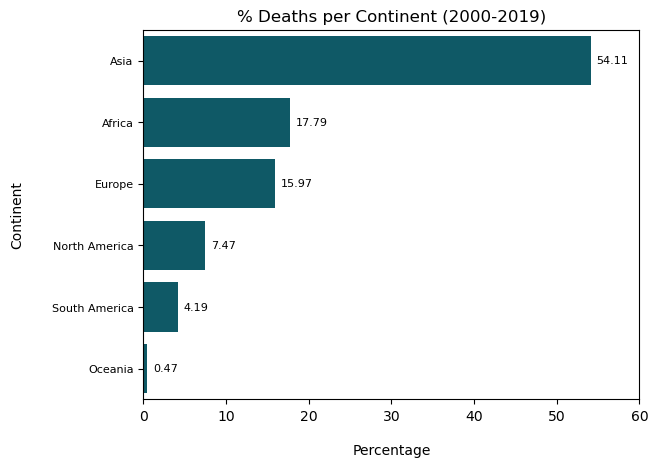

In [35]:
plotData = casecount_per_continent.Percentage
bar_order = plotData.sort_values(ascending=False).index

ax = sns.barplot(y=plotData.index, x=plotData.values, order=bar_order, color=base_color)
ax.bar_label(ax.containers[0], padding=4, fontsize=8)
plt.xlim(0,60)
plt.xlabel('Percentage', labelpad=15)
plt.ylabel('Continent', labelpad=20)
plt.yticks(fontsize=8)
plt.title('% Deaths per Continent (2000-2019)');

Asia, Africa and Europe have contributed more than 80% to the total health related deaths. Asia has the largest death, with an alarming 54.18% dead due to health related issues between 2000 and 2019. It's interesting to note that there is just a rough 2% difference in contribution to percentage deaths between Africa and Europe.

Let's compare it taking population into account.

In [36]:
propCaseCount_per_continent = causesofDeath_merge.groupby(['Continent_Name', 'Year']).sum()

In [37]:
propCaseCount_per_continent

Case_Count
Continent_Name Year                  
Africa         2000-01-01     8496428
               2001-01-01     8619203
               2002-01-01     8720891
               2003-01-01     8820552
               2004-01-01     8841889
...                               ...
South America  2015-01-01     2146047
               2016-01-01     2214725
               2017-01-01     2246181
               2018-01-01     2289423
               2019-01-01     2349832

[120 rows x 1 columns]

Let's merge the worldPopulation data to `causesofDeath_merge`

In [38]:
causesofDeath_merge['Year_str'] = causesofDeath_merge.Year.dt.year.astype('str')
causesofDeath_merge['Key'] = causesofDeath_merge['Three_Letter_Country_Code']+causesofDeath_merge['Year_str']

In [39]:
worldPopulation['Year_str'] = worldPopulation.Year.dt.year.astype('str')
worldPopulation['Key'] = worldPopulation['Code']+worldPopulation['Year_str']

In [40]:
causesofDeath_merge

,Country_Name,Year,Causes,Case_Count,Two_Letter_Country_Code,Three_Letter_Country_Code,Continent_Name,Continent_Code,Year_str,Key
0,Afghanistan,2007-01-01,Meningitis,2933,AF,AFG,Asia,AS,2007,AFG2007
1,Afghanistan,2008-01-01,Meningitis,2731,AF,AFG,Asia,AS,2008,AFG2008
2,Afghanistan,2009-01-01,Meningitis,2460,AF,AFG,Asia,AS,2009,AFG2009
3,Afghanistan,2011-01-01,Meningitis,2327,AF,AFG,Asia,AS,2011,AFG2011
4,Afghanistan,2012-01-01,Meningitis,2254,AF,AFG,Asia,AS,2012,AFG2012
...,...,...,...,...,...,...,...,...,...,...
128935,Zimbabwe,2015-01-01,Acute hepatitis,146,ZW,ZWE,Africa,AF,2015,ZWE2015
128936,Zimbabwe,2016-01-01,Acute hepatitis,146,ZW,ZWE,Africa,AF,2016,ZWE2016
128937,Zimbabwe,2017-01-01,Acute hepatitis,144,ZW,ZWE,Africa,AF,2017,ZWE2017
128938,Zimbabwe,2018-01-01,Acute hepatitis,139,ZW,ZWE,Africa,AF,2018,ZWE2018


In [41]:
causesofDeath_merge.shape     

(85680, 10)

In [42]:
causesofDeath_merge = pd.merge(left=causesofDeath_merge, right=worldPopulation.iloc[:,[3,5]], how='inner', on='Key')

In [43]:
causesofDeath_merge.shape

(85680, 11)

In [44]:
causesofDeath_merge = causesofDeath_merge.drop(labels=['Year_str', 'Key'], axis=1)

In [45]:
causesofDeath_merge['death_per_population'] = causesofDeath_merge['Case_Count']/causesofDeath_merge['Population (historical estimates)']

In [46]:
causesofDeath_merge.head()

,Country_Name,Year,Causes,Case_Count,Two_Letter_Country_Code,Three_Letter_Country_Code,Continent_Name,Continent_Code,Population (historical estimates),death_per_population
0,Afghanistan,2007-01-01,Meningitis,2933,AF,AFG,Asia,AS,25903306,0.000113
1,Afghanistan,2007-01-01,Alzheimer's disease and other dementias,1402,AF,AFG,Asia,AS,25903306,0.000054
2,Afghanistan,2007-01-01,Parkinson's disease,450,AF,AFG,Asia,AS,25903306,0.000017
3,Afghanistan,2007-01-01,Nutritional deficiencies,2488,AF,AFG,Asia,AS,25903306,0.000096
4,Afghanistan,2007-01-01,Malaria,393,AF,AFG,Asia,AS,25903306,0.000015


In [47]:
pop_casecount_per_continent = causesofDeath_merge.groupby('Continent_Name').sum()

# let's get the value in percentages
pop_casecount_per_continent['Percentage'] = pop_casecount_per_continent['death_per_population']*100/pop_casecount_per_continent.death_per_population.sum()
pop_casecount_per_continent['Percentage'] = pop_casecount_per_continent['Percentage'].round(2)

In [48]:
pop_casecount_per_continent

,Case_Count,Population (historical estimates),death_per_population,Percentage
Continent_Name,,,,
Africa,167975394,441862222872,9.164663,30.68
Asia,510936239,1758166893798,5.230784,17.51
Europe,150842704,308007794745,8.178055,27.38
North America,70561305,226083494700,3.284993,11.00
Oceania,4438408,15261916026,2.716828,9.09
South America,39558091,163901104122,1.298761,4.35


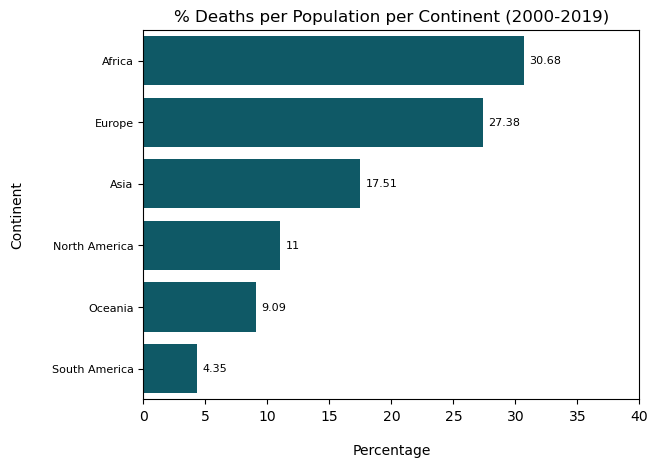

In [49]:
plotData = pop_casecount_per_continent.Percentage
bar_order = plotData.sort_values(ascending=False).index

ax = sns.barplot(y=plotData.index, x=plotData.values, order=bar_order, color=base_color)
ax.bar_label(ax.containers[0], padding=4, fontsize=8)
plt.xlim(0,40)
plt.xlabel('Percentage', labelpad=15)
plt.ylabel('Continent', labelpad=20)
plt.yticks(fontsize=8)
plt.title('% Deaths per Population per Continent (2000-2019)');

We can see that Africa and Europe both surpass Asia by about roughly 11% each. Africa tops others with 30.68% of the population estimated to be lost due to health issues, followed by Europe with 27.38%. It's worth nothing that South America and Oceania both have low deaths per population. Further research can be done to highlight why this is so and how this can be replicated in the top 3 continents. We'll focus on Africa for this analysis.

#### What are the best and worst performing countries in Africa?

In [50]:
causesofDeath_africa = causesofDeath_merge.query('Continent_Name == "Africa"')

In [51]:
causesofDeath_africa.Country_Name.nunique()

54

All 54 countries are accounted for

In [52]:
pop_casecount_africa = causesofDeath_africa.groupby('Country_Name').sum()

# let's get the value in percentages
pop_casecount_africa['Percentage'] = pop_casecount_africa['death_per_population']*100/pop_casecount_africa.death_per_population.sum()
pop_casecount_africa['Percentage'] = pop_casecount_africa['Percentage'].round(2)

''

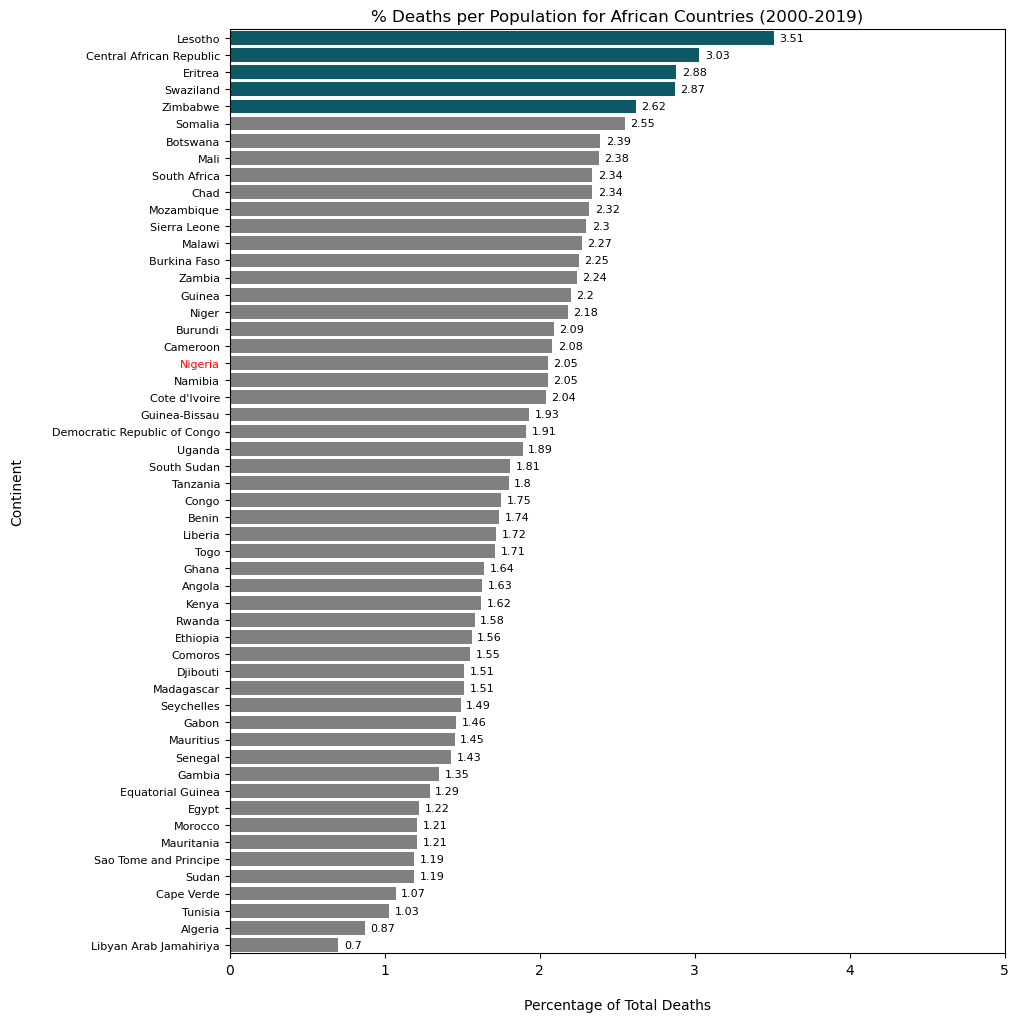

In [172]:
plotData = pop_casecount_africa.Percentage
plotData = plotData.sort_values(ascending=False)

# bar color
bar_clrs = ['grey' if (x < 2.6) else base_color for x in plotData.values ]

plt.figure(figsize=[10,12])
ax = sns.barplot(y=plotData.index, x=plotData.values, palette=bar_clrs)
ax.bar_label(ax.containers[0], padding=4, fontsize=8)
plt.xlim(0,5)
plt.xlabel('Percentage of Total Deaths', labelpad=15)
plt.ylabel('Continent', labelpad=20)
plt.yticks(fontsize=8)
plt.title('% Deaths per Population for African Countries (2000-2019)')

# change tick color
ytick_clrs = ['red' if (x == 'Nigeria') else 'black' for x in plotData.index ]

for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), ytick_clrs):
      ticklabel.set_color(tickcolor)
;

The chart above shows that Lesotho, Central African Republic and Eritrea top all other African countries with 3.51%, 3.03% and 2.88% respectively. Nigeria had the 20th position with 2.05% of its population dead due to health related uses. Libya, Algeria and Tunisia had the least % deaths per population with 0.7%, 0.87% and 1.03% respectively.

#### How does Nigeria compare to the top 5 Countries over the years

In [54]:
pop_casecount_africa_timeseries = causesofDeath_africa.groupby(['Country_Name','Year']).sum()
pop_casecount_africa_timeseries = pop_casecount_africa_timeseries.reset_index()

In [55]:
topFourCountries = ['Lesotho', 'Central African Republic', 'Eritrea', 'Swaziland', 'Zimbabwe', 'Nigeria']

pop_casecount_topFourAfrica = pop_casecount_africa_timeseries.query('Country_Name in @topFourCountries')

In [56]:
pop_casecount_topFourAfrica['Year_int'] = pop_casecount_topFourAfrica.Year.dt.year

In [57]:
#plotData = pop_casecount_topFourAfrica.pivot(index='Year', columns='Country_Name', values='death_per_population')

In [58]:
pop_casecount_topFourAfrica['pct_deaths_per_pop'] = pop_casecount_topFourAfrica['death_per_population'] * 100
pop_casecount_topFourAfrica.head()

,Country_Name,Year,Case_Count,Population (historical estimates),death_per_population,Year_int,pct_deaths_per_pop
160,Central African Republic,2000-01-01,59689,78942654,0.015878,2000,1.587822
161,Central African Republic,2001-01-01,60802,80740380,0.015814,2001,1.581417
162,Central African Republic,2002-01-01,61539,82543734,0.015656,2002,1.565617
163,Central African Republic,2003-01-01,62274,84563913,0.015465,2003,1.546468
164,Central African Republic,2004-01-01,62876,86418066,0.015279,2004,1.527917


In [59]:
viewData = pop_casecount_topFourAfrica.groupby(['Country_Name', 'Year_int']).sum()[['pct_deaths_per_pop']].reset_index()
viewData = viewData.pivot(index='Year_int', columns='Country_Name', values='pct_deaths_per_pop')

In [60]:
viewData

Country_Name,Central African Republic,Eritrea,Lesotho,Nigeria,Swaziland,Zimbabwe
Year_int,,,,,,
2000,1.587822,1.568565,1.505580,1.181554,1.300820,1.472849
2001,1.581417,1.563001,1.599467,1.170792,1.437872,1.510304
2002,1.565617,1.540102,1.697641,1.154863,1.543845,1.546454
2003,1.546468,1.495858,1.799166,1.132547,1.642696,1.564703
2004,1.527917,1.466699,1.881246,1.101413,1.710491,1.567616
2005,1.502075,1.435304,1.913395,1.068235,1.706884,1.542239
2006,1.497595,1.408253,1.881589,1.057317,1.640181,1.499584
2007,1.470250,1.384573,1.787170,1.032837,1.584203,1.446239
2008,1.417028,1.345440,1.682292,1.001990,1.535575,1.397530


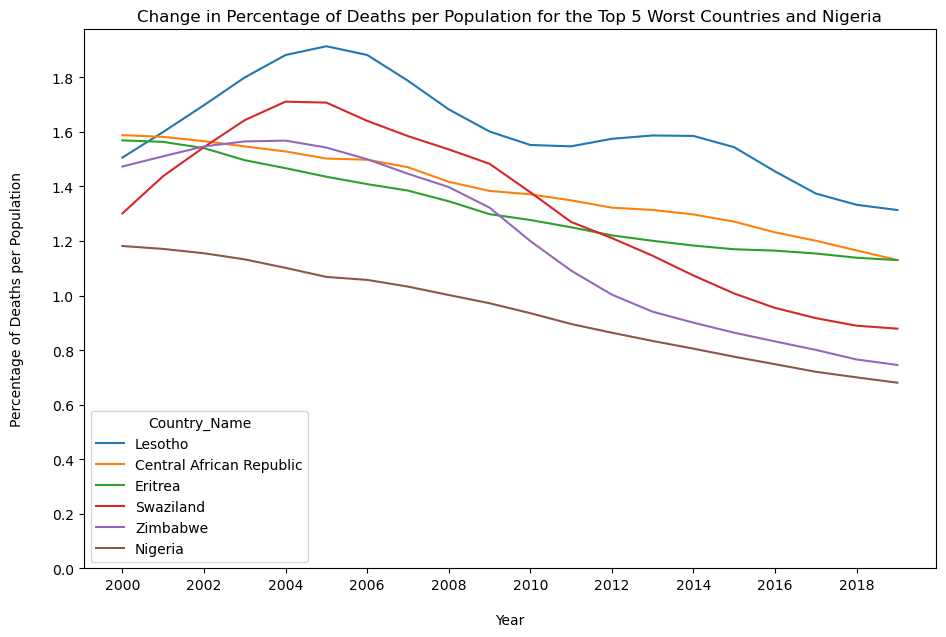

In [61]:
plt.figure(figsize=[11,7])
sns.lineplot(x='Year', y='pct_deaths_per_pop', data=pop_casecount_topFourAfrica,
             hue='Country_Name', hue_order=topFourCountries, palette='tab10')
plt.yticks(ticks=np.arange(0,2,0.2))
plt.xlabel('Year', labelpad=15)
plt.ylabel('Percentage of Deaths per Population', labelpad=20)
plt.title('Change in Percentage of Deaths per Population for the Top 5 Worst Countries and Nigeria');

Percentage of Deaths for Lesotho, Swaziland and Zimbabwe all peaked between 2004 and 2005 with percentages of 1.91%, 1.71% and 1.57%. Overall, there was a 0.448% decrease in deaths per population for the worst 5 countries while Nigeria experienced a sharp drop of 1.182% in the last 20 years.

In [62]:
viewData.drop('Nigeria', axis=1).mean(axis=1)[2000] - viewData.drop('Nigeria', axis=1).mean(axis=1)[2019]

0.44758694909933916

In [63]:
viewData['Nigeria'][2000] - viewData['Nigeria'][2019]

0.5007914462836575

In [64]:
viewData['Nigeria'][2000]

1.1815535677470215

In [65]:
causesofDeath_africa.Causes.nunique()

21

#### What causes are responsible for most of the deaths in Africa?

In [66]:
causesofDeath_africa.head()

,Country_Name,Year,Causes,Case_Count,Two_Letter_Country_Code,Three_Letter_Country_Code,Continent_Name,Continent_Code,Population (historical estimates),death_per_population
840,Algeria,2000-01-01,Meningitis,586,DZ,DZA,Africa,AF,30774624,0.000019
841,Algeria,2000-01-01,Alzheimer's disease and other dementias,2219,DZ,DZA,Africa,AF,30774624,0.000072
842,Algeria,2000-01-01,Parkinson's disease,597,DZ,DZA,Africa,AF,30774624,0.000019
843,Algeria,2000-01-01,Nutritional deficiencies,308,DZ,DZA,Africa,AF,30774624,0.000010
844,Algeria,2000-01-01,Malaria,0,DZ,DZA,Africa,AF,30774624,0.000000


In [67]:
causes_casecount = causesofDeath_africa.groupby('Causes')[['Case_Count']].sum()

In [68]:
causes_casecount

,Case_Count
Causes,
Acute hepatitis,437405
Alzheimer's disease and other dementias,1263371
Cardiovascular diseases,26640349
Chronic kidney disease,2700543
Chronic respiratory diseases,4041479
Cirrhosis and other chronic liver diseases,4556263
Diabetes mellitus,3231764
Diarrheal diseases,16020807
Digestive diseases,7132921


In [69]:
causes_casecount['Percentages'] = (causes_casecount.Case_Count * 100)/causes_casecount.Case_Count.sum()
causes_casecount['Percentages'] = causes_casecount['Percentages'].round(2)
causes_casecount = causes_casecount.sort_values(by='Percentages', ascending=False)

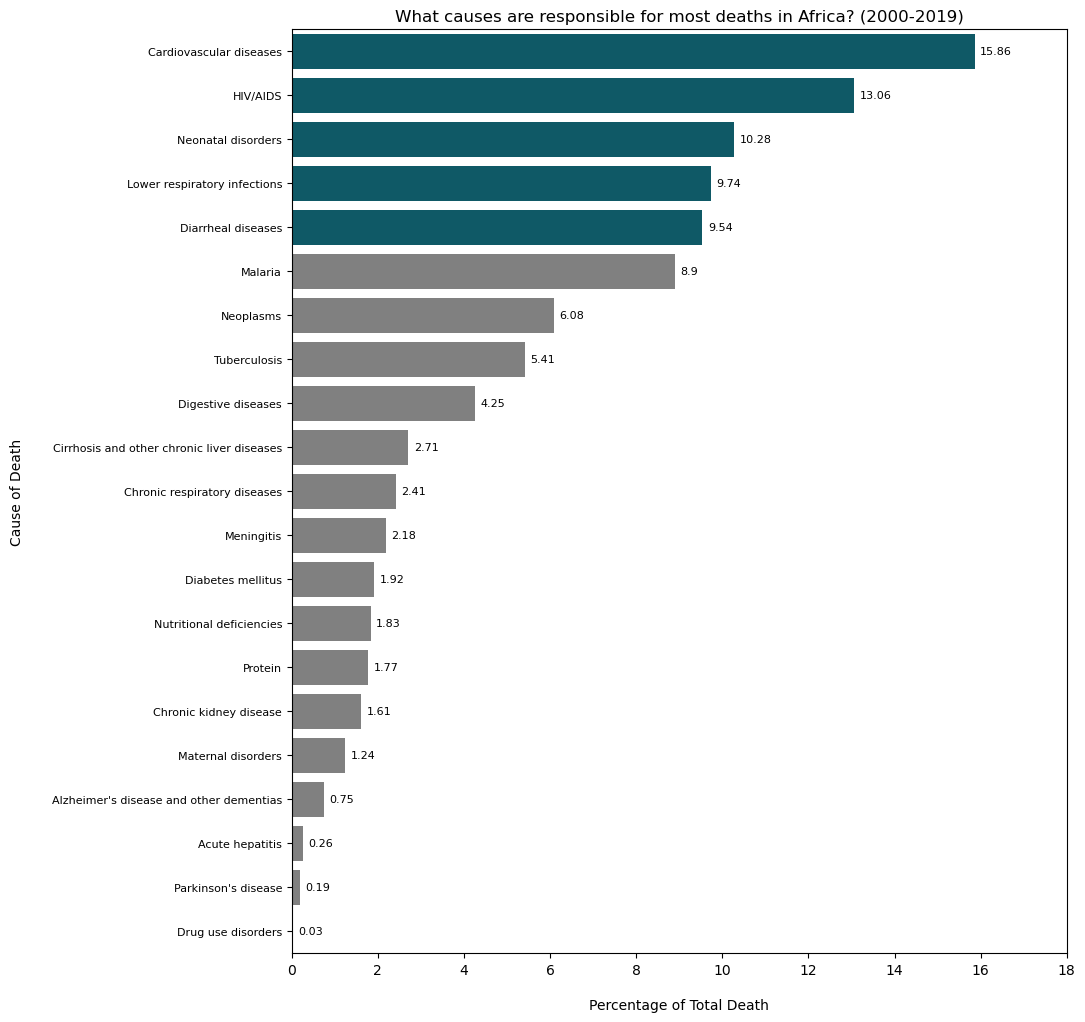

In [173]:
plotData = causes_casecount.Percentages

# bar color
bar_clrs = ['grey' if (x < 9) else base_color for x in plotData.values ]

plt.figure(figsize=[10,12])
ax = sns.barplot(y=plotData.index, x=plotData.values, palette=bar_clrs)
ax.bar_label(ax.containers[0], padding=4, fontsize=8)
plt.xlim(0,18)
plt.xlabel('Percentage of Total Death', labelpad=15)
plt.ylabel('Cause of Death', labelpad=20)
plt.yticks(fontsize=8)
plt.title('What causes are responsible for most deaths in Africa? (2000-2019)');

For the period of 2000 to 2019, Cardiovascular diseases (15.86%) and HIV/AIDS (13.06%) have been responsible for most health related deaths in Africa. The top 6 causes contribute a bit above 65% of the total deaths. It is shocking to see Neonatal disorders accounts for 10.28% of the total deaths. This suggests that special attention needs to placed on Postnatal care and Maternal care, although Maternal disorders account for 1.24%. The least causes of deaths are Drug use disorders, Parkinson's disease and Acute hepatitis which account for just 0.45% of the total deaths.

#### What are top causes responsible for deaths in the top 5 Countries and Nigeria?

In [71]:
topCountries = ['Lesotho', 'Central African Republic', 'Eritrea', 'Swaziland', 'Zimbabwe', 'Nigeria']
causesofDeath_africa_topcountries = causesofDeath_africa.query('Country_Name in @topCountries')

In [72]:
agg_causesDeath_topcountries = causesofDeath_africa_topcountries.groupby(['Causes','Country_Name'])['Case_Count'].aggregate('sum').unstack()

In [73]:
agg_causesDeath_topcountries = agg_causesDeath_topcountries.reindex(labels=plotData.index)
agg_causesDeath_topcountries = agg_causesDeath_topcountries[topCountries]

In [74]:
agg_causesDeath_topcountries

Country_Name,Lesotho,Central African Republic,Eritrea,Swaziland,Zimbabwe,Nigeria
Causes,,,,,,
Cardiovascular diseases,77799,119644,102068,28505,307689,2885774
HIV/AIDS,276902,196570,52395,136708,1306142,1818510
Neonatal disorders,29827,110916,70264,10963,178084,3842360
Lower respiratory infections,41619,123897,94599,17909,244195,3983180
Diarrheal diseases,38187,158464,100261,13434,103148,4670449
Malaria,0,104740,5845,260,83440,4610044
Neoplasms,38728,45675,55889,17973,204224,1235480
Tuberculosis,56847,163467,97697,18063,219023,1112861
Digestive diseases,16911,38396,39901,6893,78808,1250214


In [75]:
# Let's normalize the df
agg_causesDeath_topcountries_PCT = agg_causesDeath_topcountries.div(agg_causesDeath_topcountries.sum())
agg_causesDeath_topcountries_PCT *= 100

In [76]:
agg_causesDeath_topcountries_PCT

Country_Name,Lesotho,Central African Republic,Eritrea,Swaziland,Zimbabwe,Nigeria
Causes,,,,,,
Cardiovascular diseases,11.805847,9.637005,12.874954,9.918854,9.965177,9.811983
HIV/AIDS,42.019342,15.833190,6.609155,47.570133,42.302249,6.183156
Neonatal disorders,4.526189,8.933988,8.863167,3.814783,5.767638,13.064492
Lower respiratory infections,6.315603,9.979573,11.932807,6.231775,7.908786,13.543297
Diarrheal diseases,5.794803,12.763853,12.647017,4.674614,3.340672,15.880096
Malaria,0.000000,8.436528,0.737294,0.090472,2.702386,15.674711
Neoplasms,5.876899,3.679000,7.049891,6.254045,6.614238,4.200782
Tuberculosis,8.626422,13.166831,12.323592,6.285362,7.093536,3.783863
Digestive diseases,2.566211,3.092695,5.033150,2.398550,2.552368,4.250880


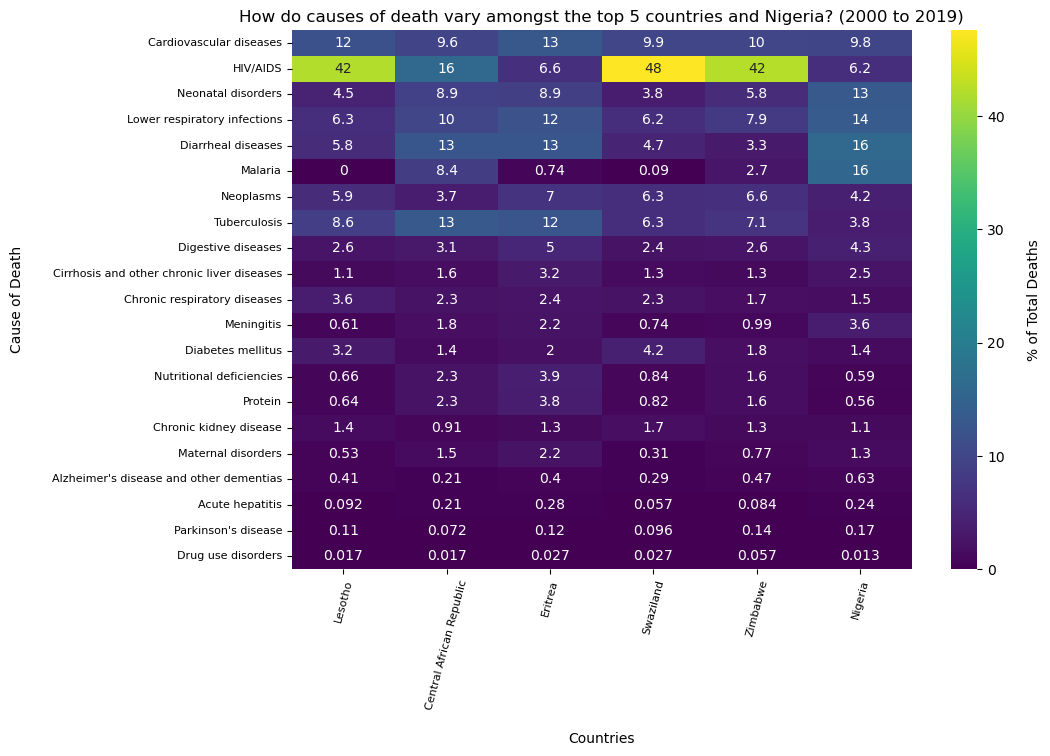

In [77]:
plt.figure(figsize=[10,7])
sns.heatmap(agg_causesDeath_topcountries_PCT, cmap='viridis', annot=True, cbar_kws={'label':'\n% of Total Deaths'})
plt.xticks(rotation=75)
plt.xlabel('Countries', labelpad=15)
plt.ylabel('Cause of Death', labelpad=20)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.title("How do causes of death vary amongst the top 5 countries and Nigeria? (2000 to 2019)");

Lesotho, Swaziland and Zimbabwe have an average of 48% of deaths relating of HIV/AIDs. It's interesting to note that of the worst 5 countries, Lesotho, Eritrea and Swaziland have low deaths due to malaria. Lesotho has a 0% death rate for malaria because Lesotho is a [malaria free country](https://www.who.int/teams/global-malaria-programme/elimination/countries-and-territories-certified-malaria-free-by-who). Nigeria, on the other hand, has its highest death due to Malaria and Diarrheal diseases which is 16% each of the total deaths. Following after that are deaths due to Lower respiratory infections and neonatal diseases (14% and 13% respectively).

##### What is the yearly variation of the top 7 diseases?

In [78]:
worst7diseases = plotData.index[:7]
worst7diseases

Index(['Cardiovascular diseases', 'HIV/AIDS', 'Neonatal disorders',
       'Lower respiratory infections', 'Diarrheal diseases', 'Malaria',
       'Neoplasms'],
      dtype='object', name='Causes')

In [79]:
worst7diseases_africaDeaths = causesofDeath_africa_topcountries.query('Causes in @worst7diseases')
worst7diseases_africaDeaths['pct_deaths_per_pop'] = worst7diseases_africaDeaths.death_per_population * 100

In [80]:
worst7diseases_africaDeaths.shape

(840, 11)

In [81]:
worst7diseases_africaDeaths.head()

,Country_Name,Year,Causes,Case_Count,Two_Letter_Country_Code,Three_Letter_Country_Code,Continent_Name,Continent_Code,Population (historical estimates),death_per_population,pct_deaths_per_pop
14284,Central African Republic,2000-01-01,Malaria,4434,CF,CAF,Africa,AF,3759174,0.001180,0.117951
14286,Central African Republic,2000-01-01,HIV/AIDS,12950,CF,CAF,Africa,AF,3759174,0.003445,0.344491
14289,Central African Republic,2000-01-01,Cardiovascular diseases,5066,CF,CAF,Africa,AF,3759174,0.001348,0.134764
14290,Central African Republic,2000-01-01,Lower respiratory infections,6091,CF,CAF,Africa,AF,3759174,0.001620,0.162030
14291,Central African Republic,2000-01-01,Neonatal disorders,4963,CF,CAF,Africa,AF,3759174,0.001320,0.132024


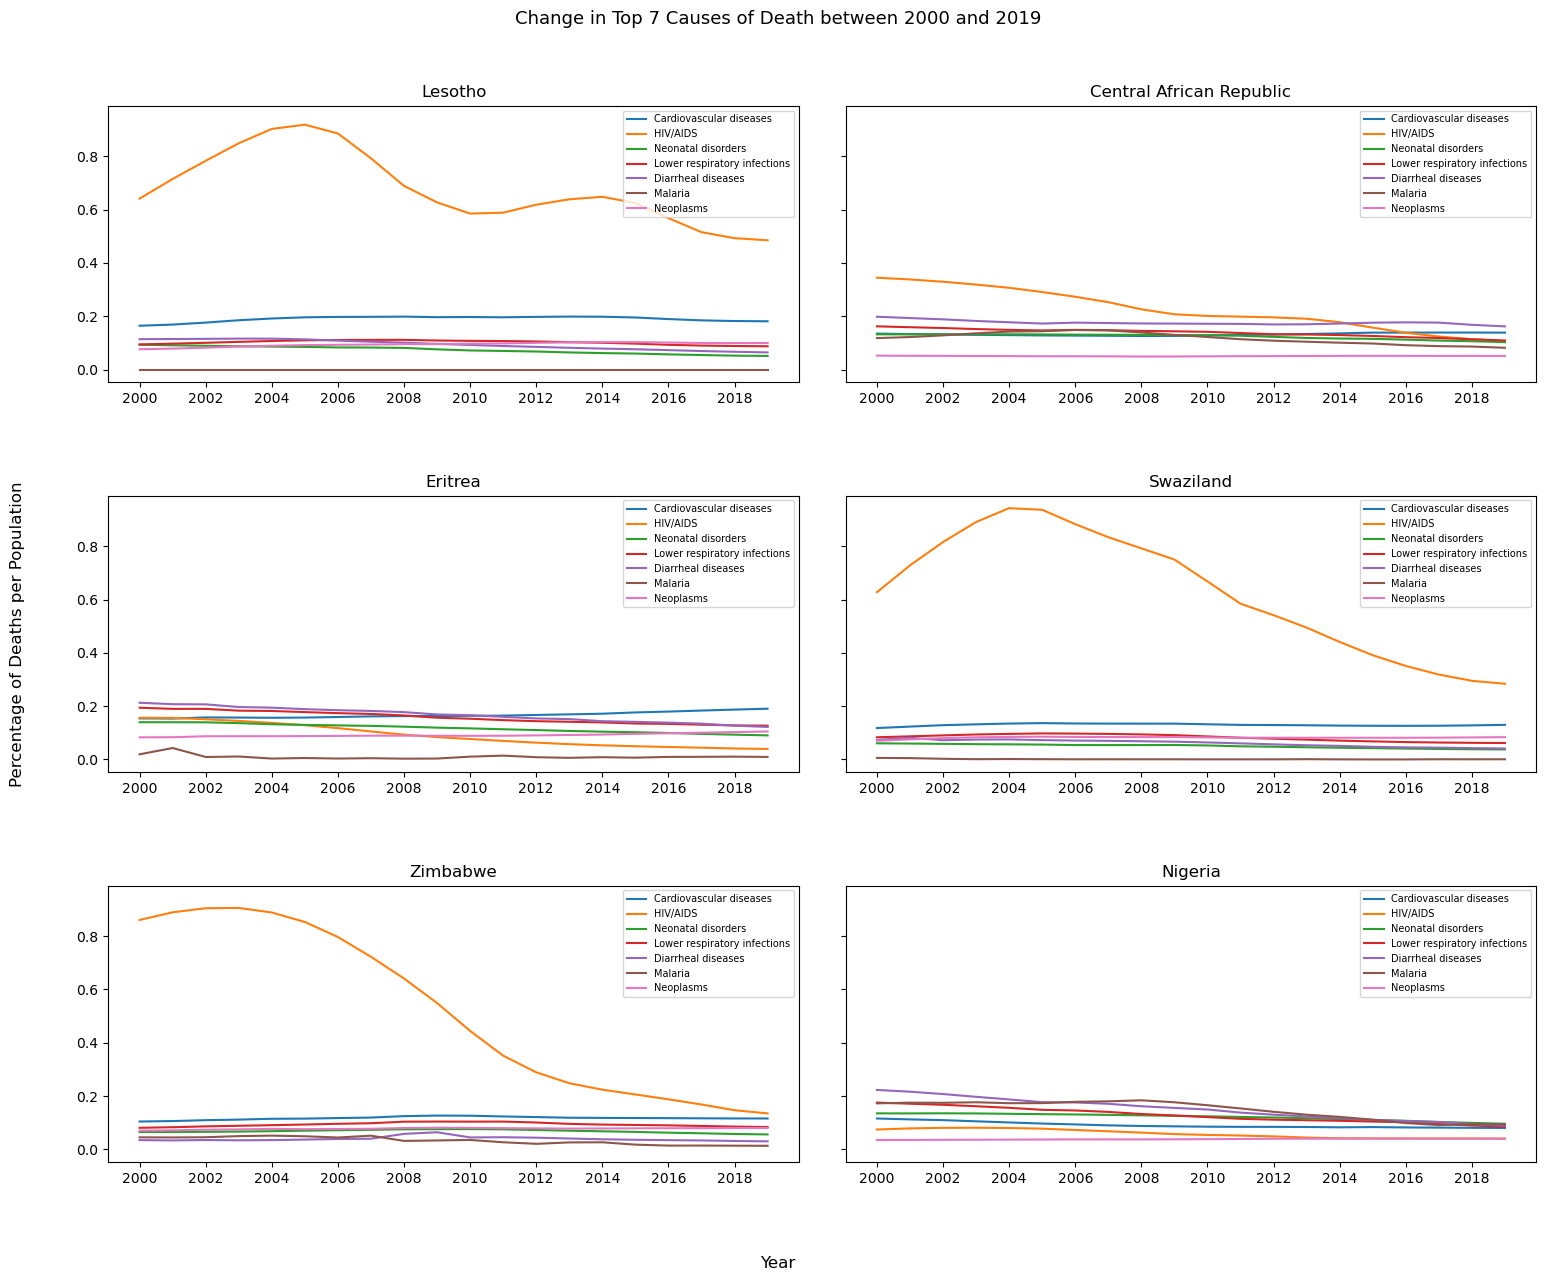

In [82]:
# resize figure to accommodate two plots
## plt.figure(figsize=[20,5])

fig, axes = plt.subplots(3, 2, sharex=False, sharey=True, figsize=(16, 13))
hue_order = worst7diseases
countries = ['Lesotho', 'Central African Republic', 'Eritrea', 'Swaziland', 'Zimbabwe', 'Nigeria']

# Use the axes for plotting
for i,j in enumerate(countries):
      if i < 2:
            plotData = worst7diseases_africaDeaths.query('Country_Name == @j')
            g = sns.lineplot(x='Year', y='pct_deaths_per_pop', data=plotData,
                        hue='Causes', hue_order=hue_order, palette='tab10',
                        ax=axes[0,i])
            g.legend(fontsize=7)
            axes[0,i].set_xlabel('')
            axes[0,i].set_ylabel('')
            axes[0,i].set_title(j)
      elif i < 4:
            plotData = worst7diseases_africaDeaths.query('Country_Name == @j')
            g = sns.lineplot(x='Year', y='pct_deaths_per_pop', data=plotData,
                        hue='Causes', hue_order=hue_order, palette='tab10',
                        ax=axes[1,i-2])
            g.legend(fontsize=7)
            #axes[0,0].set_yticks(ticks=np.arange(0,2,0.2))
            axes[1,i-2].set_xlabel('')
            axes[1,i-2].set_ylabel('')
            axes[1,i-2].set_title(j)
      else:
            plotData = worst7diseases_africaDeaths.query('Country_Name == @j')
            g = sns.lineplot(x='Year', y='pct_deaths_per_pop', data=plotData,
                        hue='Causes', hue_order=hue_order, palette='tab10',
                        ax=axes[2,i-4])
            g.legend(fontsize=7)
            axes[2,i-4].set_xlabel('')
            axes[2,i-4].set_ylabel('')
            axes[2,i-4].set_title(j)            
            

fig.supxlabel('Year')
fig.supylabel('Percentage of Deaths per Population')
fig.suptitle('Change in Top 7 Causes of Death between 2000 and 2019', fontsize=13)
fig.tight_layout(pad=3, h_pad=5)
 
plt.show()

We can see that HIV/AIDS was a serious problem for African countries with Lesotho, Swaziland and Zimbabwe reaching peaks of above 0.8% deaths per population, between 2002 and 2006, which surpassed the other causes of deaths by about 0.6%. 

Lesotho is a country known to be battling the HIV/AIDS epidemic which is fueled by behavioural, social and structural drivers and this explains its high percentage contribution. Some of this factors that drive this include the prevalence of multiple sexual partnerships combined with unsafe sexual practices, the abuse and sexual exploitation of women, etc. 

Unlike Lesotho, the other counties have experience a sharp fall in percentage contributions with most having values below 0.4%.

Source: [Government of Lesotho, Final Report for a Joint Review of HIV/Tuberculosis and Hepatitis programmes.](https://www.unaids.org/sites/default/files/country/documents/LSO_2018_countryreport.pdf)

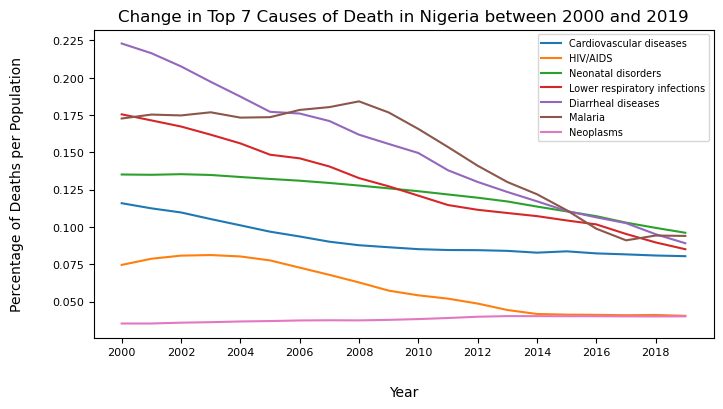

In [83]:
plotData = worst7diseases_africaDeaths.query('Country_Name == "Nigeria"')

plt.figure(figsize=[8,4])
g = sns.lineplot(x='Year', y='pct_deaths_per_pop', data=plotData,
                 hue='Causes', hue_order=hue_order, palette='tab10')
g.legend(fontsize=7)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel('Year', labelpad=20)
plt.ylabel('Percentage of Deaths per Population', labelpad=20)
plt.title('Change in Top 7 Causes of Death in Nigeria between 2000 and 2019');

There sharp decline in deaths due to Diarrheal diseases, Lower respiratory infections, and Malaria by an average of 53.2% between 2000 and 2019. Neonatal disorders, which is now top cause of death in 2019 and Cardiovascular diseases have relatively the same by just experiencing an average of 30% drop. While HIV/AIDS related deaths have dropped from 0.075% in 2000 to a bit below 0.050% in 2019, deaths due to Neoplasms seem to be on the increase steadily, having a value of 0.035% in 2000, it has increased to 0.04 in 2019.

Nigeria needs to place emphasis on Antenatal and Postnatal cares for mothers and deaths due to Neoplasms need to be checkmated as it is gradually on the rise.

#### What is the distribution of deaths among the age groups in Africa?

In [84]:
ageGroupDeaths

,Entity,Code,Year,Age_Group,Death_Count
10,Afghanistan,AFG,2000-01-01,70+ years,41552
11,Afghanistan,AFG,2001-01-01,70+ years,42076
12,Afghanistan,AFG,2002-01-01,70+ years,42225
13,Afghanistan,AFG,2003-01-01,70+ years,41984
14,Afghanistan,AFG,2004-01-01,70+ years,42107
...,...,...,...,...,...
34195,Zimbabwe,ZWE,2015-01-01,Under 5 years,26551
34196,Zimbabwe,ZWE,2016-01-01,Under 5 years,25499
34197,Zimbabwe,ZWE,2017-01-01,Under 5 years,24766
34198,Zimbabwe,ZWE,2018-01-01,Under 5 years,23905


In [85]:
ageGroupDeaths_merge = pd.merge(left=ageGroupDeaths, right=worldCountries, how='inner', left_on='Code', right_on='Three_Letter_Country_Code')
ageGroupDeaths_merge = ageGroupDeaths_merge.drop(labels=['Entity', 'Country_Number'], axis=1)
ageGroupDeaths_merge = ageGroupDeaths_merge.iloc[:,[6,1,2,3,7,8,4,5]]

Let's merge the worldPopulation data to `ageGroupDeaths_merge`

In [86]:
ageGroupDeaths_merge['Year_str'] = ageGroupDeaths_merge.Year.dt.year.astype('str')
ageGroupDeaths_merge['Key'] = ageGroupDeaths_merge['Three_Letter_Country_Code']+ageGroupDeaths_merge['Year_str']

In [87]:
ageGroupDeaths_merge = pd.merge(left=ageGroupDeaths_merge, right=worldPopulation.iloc[:,[3,5]], how='inner', on='Key')
ageGroupDeaths_merge = ageGroupDeaths_merge.drop(labels=['Year_str', 'Key'], axis=1)
ageGroupDeaths_merge['death_per_population'] = ageGroupDeaths_merge['Death_Count']/ageGroupDeaths_merge['Population (historical estimates)']

In [88]:
ageGroupDeaths_africa = ageGroupDeaths_merge.query('Continent_Name == "Africa"')

In [89]:
ageGroupDeaths_africa.shape

(5400, 10)

In [90]:
ageGroupDeaths_africa.head()

,Country_Name,Year,Age_Group,Death_Count,Two_Letter_Country_Code,Three_Letter_Country_Code,Continent_Name,Continent_Code,Population (historical estimates),death_per_population
200,Algeria,2000-01-01,70+ years,58952,DZ,DZA,Africa,AF,30774624,0.001916
201,Algeria,2000-01-01,50-69 years,31768,DZ,DZA,Africa,AF,30774624,0.001032
202,Algeria,2000-01-01,15-49 years,31272,DZ,DZA,Africa,AF,30774624,0.001016
203,Algeria,2000-01-01,5-14 years,5667,DZ,DZA,Africa,AF,30774624,0.000184
204,Algeria,2000-01-01,Under 5 years,29365,DZ,DZA,Africa,AF,30774624,0.000954


I was contemplating on whether I should have use mean when aggregating and not sum. But it turns out that it doesn't matter. They both generate the same results when looking at the percentages.

In [91]:
plotData = ageGroupDeaths_africa.groupby('Age_Group').mean()
plotData['pct_death_per_population'] = plotData['death_per_population'] * 100 /plotData['death_per_population'].sum()
plotData

,Death_Count,Population (historical estimates),death_per_population,pct_death_per_population
Age_Group,,,,
Under 5 years,68005.338889,1.948246e+07,0.003316,34.579798
5-14 years,5658.735185,1.948246e+07,0.000303,3.158797
15-49 years,38514.890741,1.948246e+07,0.002354,24.547733
50-69 years,31668.403704,1.948246e+07,0.001806,18.837776
70+ years,32611.657407,1.948246e+07,0.001810,18.875897


In [92]:
plotData = ageGroupDeaths_africa.groupby('Age_Group').sum()
plotData['pct_death_per_population'] = plotData['death_per_population'] * 100 /plotData['death_per_population'].sum()
plotData

,Death_Count,Population (historical estimates),death_per_population,pct_death_per_population
Age_Group,,,,
Under 5 years,73445766,21041058232,3.581320,34.579798
5-14 years,6111434,21041058232,0.327147,3.158797
15-49 years,41596082,21041058232,2.542331,24.547733
50-69 years,34201876,21041058232,1.950969,18.837776
70+ years,35220590,21041058232,1.954917,18.875897


In [93]:
plotData['pct_death_per_population'] = plotData['pct_death_per_population'].round(2)
plotData = plotData.reset_index()

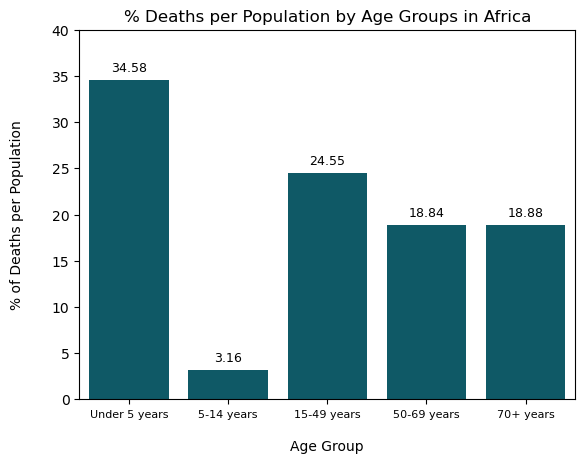

In [94]:
ax = sns.barplot(x='Age_Group', y='pct_death_per_population', data=plotData, color=base_color)
ax.bar_label(ax.containers[0], padding=4, fontsize=9)
plt.ylim(0,40)
plt.xlabel('Age Group', labelpad=15)
plt.ylabel('% of Deaths per Population', labelpad=20)
plt.xticks(fontsize=8)
plt.title('% Deaths per Population by Age Groups in Africa');

Majority of the deaths in Africa, which is approximately 60%, occured in the 'Under 5 years' (34.58%) and '15-49 years' (24.55%) age groups. Deaths amongst babies appears to be a huge concern in the African countries however, there is a considerably low percentage of '5-14 years' deaths with just 3.16% of deaths per population. Deaths occuring between 50 and 69 years, and 70+ years appears similar having an average value of 18.86%. More children and youths are dying compared to the older ones.

Let's have a look at Nigeria.

#### What is the distribution of deaths among the age groups in Nigeria?

In [95]:
# get the deaths per age group for Nigeria
## ideally, you should have done this with the ageGroupDeaths data to avoid code repetition.
ageGroupDeaths_Nigeria = ageGroupDeaths_africa.query("Country_Name == 'Nigeria'")
ageGroupDeaths_Nigeria['pct_death_per_population'] = ageGroupDeaths_Nigeria['death_per_population'] * 100 /ageGroupDeaths_Nigeria['death_per_population'].sum()
ageGroupDeaths_Nigeria['pct_death_per_population'] = ageGroupDeaths_Nigeria['pct_death_per_population'].round(2)

In [96]:
plotData = ageGroupDeaths_Nigeria.groupby('Age_Group').sum()
plotData = plotData.reset_index()

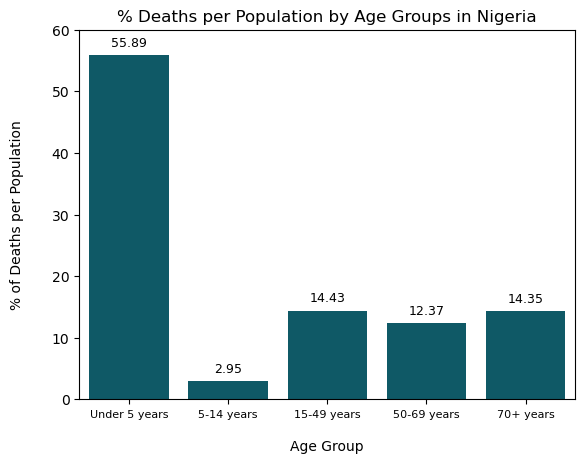

In [97]:
ax = sns.barplot(x='Age_Group', y='pct_death_per_population', data=plotData, color=base_color)
ax.bar_label(ax.containers[0], padding=4, fontsize=9)
plt.ylim(0,60)
plt.xlabel('Age Group', labelpad=15)
plt.ylabel('% of Deaths per Population', labelpad=20)
plt.xticks(fontsize=8)
plt.title('% Deaths per Population by Age Groups in Nigeria');

Nigeria recorded a higher percentage of 55.89% for deaths on under 5 years than that of Africa which was 34.58%. Generally, the deaths for all other groups experienced an 32.5% drop averagely when compared to the values for Africa.

#### What is change in distribution of deaths by age groups in Nigeria between 2000 and 2019?

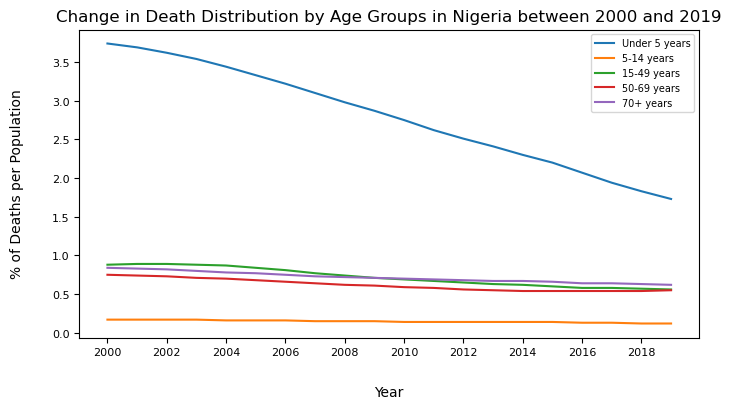

In [98]:
plt.figure(figsize=[8,4])
g = sns.lineplot(x='Year', y='pct_death_per_population', data=ageGroupDeaths_Nigeria,
                 hue='Age_Group', palette='tab10')
g.legend(fontsize=7)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel('Year', labelpad=20)
plt.ylabel('% of Deaths per Population', labelpad=20)
plt.title('Change in Death Distribution by Age Groups in Nigeria between 2000 and 2019');

When looking at the yearly change in percentage of deaths per population by age groups in Nigeria, we can see that deaths for the 'Under 5 years' have dropped drastically, although it is still high. From a bit above 3.5% in 2000 to 1.76% in 2019. Percentage of deaths per population for age groups 15-49 years, 50-69 years and 70+ years have remained steady over the years having a range of 0.5% to 1.0% while age group 5-14 years remained steadily low with an average value of 0.15%. 

Priority needs to be placed on further reducing the deaths of babies while also reducing the deaths of the other age groups which have remained steady.

#### What is distribution of Medical Doctors per 10,000 people in African Countries?

In [107]:
doctorsPerPopulation.head()

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,ThreeLocCode,Location,Year,FactValueNumeric
0,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2018-01-01,2.14
1,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2017-01-01,2.15
2,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2009-01-01,1.31
3,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2004-01-01,0.62
6,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,BDI,Burundi,2018-01-01,0.97


In [99]:
doctorsPerPopulation.query('ParentLocation == "Africa"').Indicator.value_counts()

Medical doctors (per 10,000)                    383
Medical doctors (number)                        383
Medical doctors not further defined (number)    303
Specialist medical practitioners (number)        96
Generalist medical practitioners (number)        93
Name: Indicator, dtype: int64

Let's get data for only African countries and records for 'Medical doctors (per 10,000)'

In [108]:
doctorsPerPopulation_africa = doctorsPerPopulation.query('ParentLocation == "Africa" & Indicator == "Medical doctors (per 10,000)"')

How many years of data do we have?

In [135]:
doctorsPerPopulation_africa.groupby('Location').nunique()

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,ThreeLocCode,Year,FactValueNumeric
Location,,,,,,,
Algeria,1,1,1,1,1,5,5
Angola,1,1,1,1,1,4,4
Benin,1,1,1,1,1,7,7
Botswana,1,1,1,1,1,15,14
Burkina Faso,1,1,1,1,1,13,12
Burundi,1,1,1,1,1,9,9
Cameroon,1,1,1,1,1,7,7
Cape Verde,1,1,1,1,1,8,8
Central African Republic,1,1,1,1,1,5,4


Since this dataset doesn't have up to 10 years for most of the countries, I'll make use of the median value to prevent the influence of outliers.

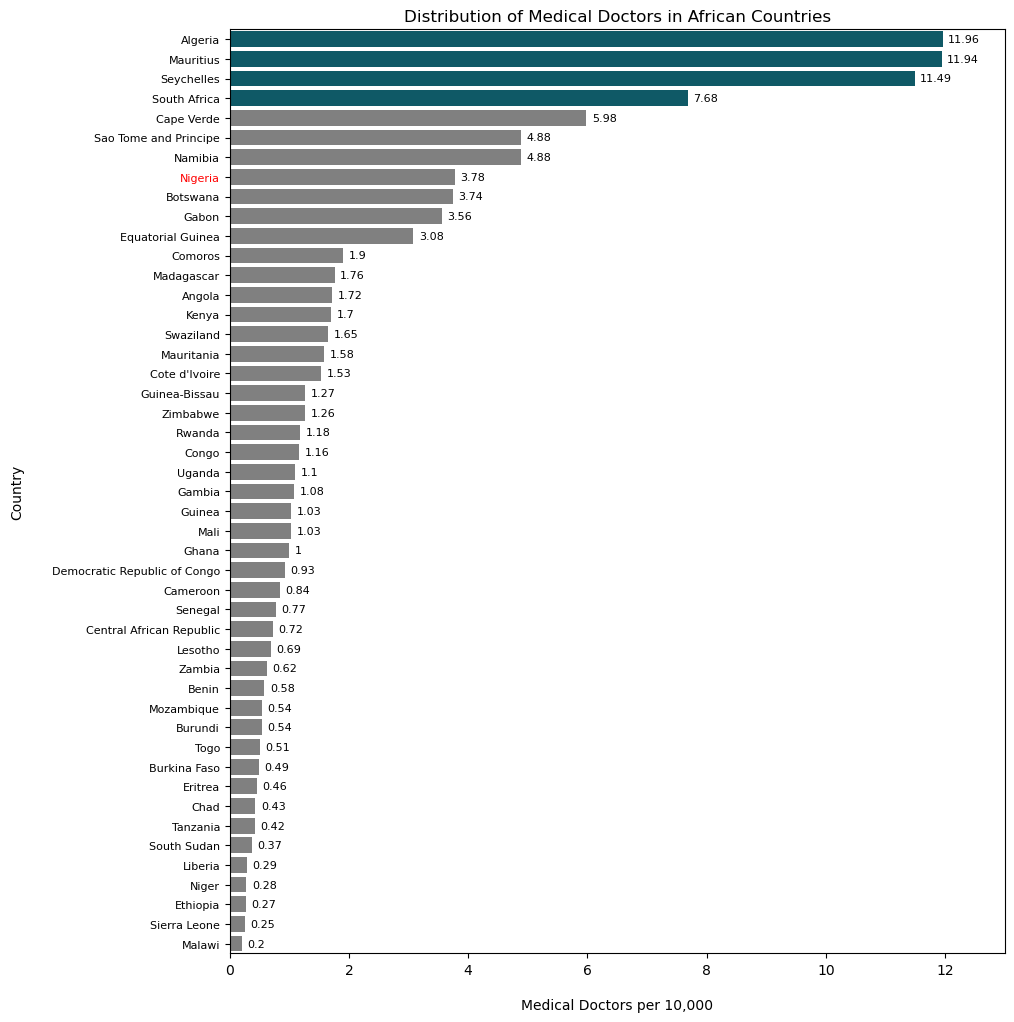

In [174]:
plotData = doctorsPerPopulation_africa.groupby('Location').median().reset_index()
plotData['FactValueNumeric'] = plotData.FactValueNumeric.round(2)
plotData = plotData.sort_values(by='FactValueNumeric', ascending=False)

# bar color
bar_clrs = ['grey' if (x < 7) else base_color for x in plotData.FactValueNumeric ]

plt.figure(figsize=[10,12])
ax = sns.barplot(y='Location', x='FactValueNumeric', data=plotData, palette=bar_clrs)
ax.bar_label(ax.containers[0], padding=4, fontsize=8)
plt.xlim(0,13)
plt.xlabel('Medical Doctors per 10,000', labelpad=15)
plt.ylabel('Country', labelpad=20)
plt.yticks(fontsize=8)
plt.title('Distribution of Medical Doctors in African Countries')

# change tick color
ytick_clrs = ['red' if (x == 'Nigeria') else 'black' for x in plotData.Location ]

for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), ytick_clrs):
      ticklabel.set_color(tickcolor)
      
plt.show()

This chart illustrates the lack of medical doctors all across Africa. Only Algeria, Mauritius and Seychelles have more than 10 doctors per 10,000 people. While a shocking 76.6% of the countries have below 2 doctors per 10,000 people. 

This is a major cause for concern seeing that these numbers are reducing as more doctors are leaving their respective countries in Africa to look for better opportunities overseas. Each African government needs to formulate policies that would favor their doctors by improving the quality of education, building relevant and well equipped health facilites, and increasing the pay for doctors. Medical doctors in Nigeria earn an average of 3,600,000 NGN annually (6634.72 GBP) while their counterparts in UK earn an average of 76,300 GBP. This alone serves as a enough push factor for the doctors.

In [153]:
healthExpenditure

,Country Name,Country_Code,Year,Health Expenditure (% of GDP)
0,Aruba,ABW,2000-01-01,NaN
1,Africa Eastern and Southern,AFE,2000-01-01,6.252428
2,Afghanistan,AFG,2000-01-01,NaN
3,Africa Western and Central,AFW,2000-01-01,3.771302
4,Angola,AGO,2000-01-01,1.908599
...,...,...,...,...
5315,Kosovo,XKX,2019-01-01,NaN
5316,"Yemen, Rep.",YEM,2019-01-01,NaN
5317,South Africa,ZAF,2019-01-01,9.109355
5318,Zambia,ZMB,2019-01-01,5.312203


#### What is distribution of Health Expenditure per 10,000 people in African Countries?

In [154]:
healthExpenditure.head()

,Country Name,Country_Code,Year,Health Expenditure (% of GDP)
0,Aruba,ABW,2000-01-01,NaN
1,Africa Eastern and Southern,AFE,2000-01-01,6.252428
2,Afghanistan,AFG,2000-01-01,NaN
3,Africa Western and Central,AFW,2000-01-01,3.771302
4,Angola,AGO,2000-01-01,1.908599


In [165]:
healthExpenditure['Health Expenditure (% of GDP)'].mean()

6.158719624715753

In [159]:
healthExpenditure.shape

(5320, 4)

Create a subset for African countries.

In [158]:
healthExpenditure_africa = healthExpenditure.query('Country_Code in @africanCountries.Three_Letter_Country_Code')
healthExpenditure_africa.shape

(1080, 4)

How many years of data do we have?

In [161]:
healthExpenditure_africa.groupby('Country Name')['Year'].nunique().value_counts()

20    54
Name: Year, dtype: int64

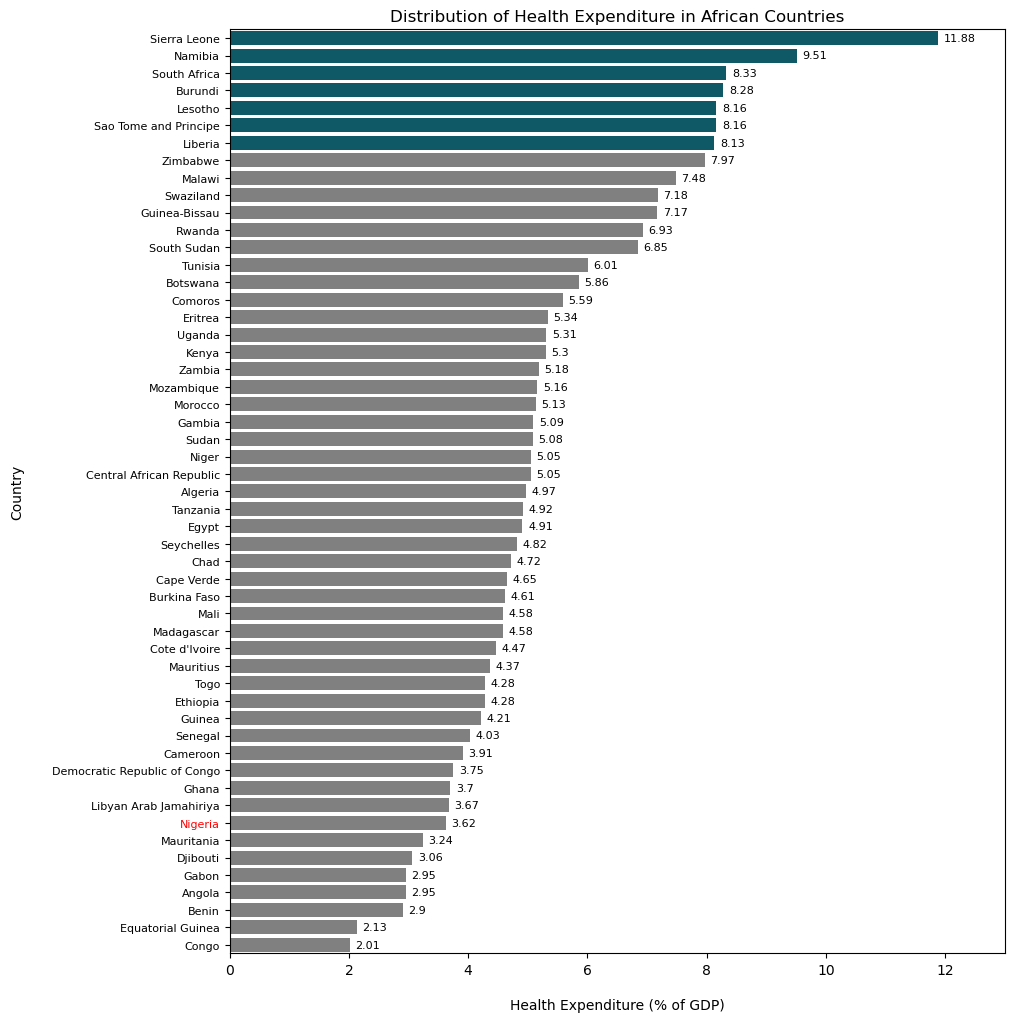

In [176]:
plotData = healthExpenditure_africa.groupby('Country Name').mean().reset_index()
plotData = plotData.dropna()
plotData['Health Expenditure (% of GDP)'] = plotData['Health Expenditure (% of GDP)'].round(2)
plotData = plotData.sort_values(by='Health Expenditure (% of GDP)', ascending=False)

# bar color
bar_clrs = ['grey' if (x < 8) else base_color for x in plotData['Health Expenditure (% of GDP)'] ]

plt.figure(figsize=[10,12])
ax = sns.barplot(y='Country Name', x='Health Expenditure (% of GDP)', data=plotData, palette=bar_clrs)
ax.bar_label(ax.containers[0], padding=4, fontsize=8)
plt.xlim(0,13)
plt.xlabel('Health Expenditure (% of GDP)', labelpad=15)
plt.ylabel('Country', labelpad=20)
plt.yticks(fontsize=8)
plt.title('Distribution of Health Expenditure in African Countries')

# change tick color
ytick_clrs = ['red' if (x == 'Nigeria') else 'black' for x in plotData['Country Name'] ]

for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), ytick_clrs):
      ticklabel.set_color(tickcolor)
      
plt.show()

Sierra Leone has the highest health expenditure of 11.88% of GDP followed by Namibia which lags at 9.51%. Majority of the countries have their health expenditures below 7% with Congo, Equatorial Guinea, Benin, Angola and Gabon having below 3% health expenditure. Nigeria performs poorly with a health expenditure of 3.62%.

This suggests that governments need to allocate more resources towards the health sector.

### Summary of Findings
* 30.68% of the population in Africa are estimated to have been lost due to health issues which is higher than all other continents. It's worth nothing that South America and Oceania both have low deaths per population. Further research can be done to highlight why this is so and how this can be replicated in the top 3 continents. We'll focus on Africa for this analysis.
* Lesotho, Central African Republic and Eritrea are the worst performing countries in African with an estimated deaths per population of 3.51%, 3.03% and 2.88% respectively. Nigeria had the 20th position with 2.05% of its population dead due to health related uses. Libya, Algeria and Tunisia had the least % deaths per population with 0.7%, 0.87% and 1.03% respectively.
* For the period of 2000 to 2019, Cardiovascular diseases (15.86%) and HIV/AIDS (13.06%) have been responsible for most health related deaths in Africa. It is shocking to see Neonatal disorders accounts for 10.28% of the total deaths.  The least causes of deaths are Drug use disorders, Parkinson's disease and Acute hepatitis which account for just 0.45% of the total deaths.
* Lesotho is a country known to be battling the HIV/AIDS epidemic which is fueled by behavioural, social and structural drivers and this explains its struggle to bring its contribution to deaths below 0.4%. Some of the factors that drive this include the prevalence of multiple sexual partnerships combined with unsafe sexual practices, the abuse and sexual exploitation of women, etc. 
* More children and youths are dying compared to the older ones, as majority of the deaths in Africa, which is approximately 60%, occured in the 'Under 5 years' (34.58%) and '15-49 years' (24.55%) age groups.
* There is a lack of medical doctors all across Africa. Only Algeria, Mauritius and Seychelles have more than 10 doctors per 10,000 people. While a shocking 76.6% of African countries have below 2 doctors per 10,000 people. 
* Sierra Leone has the highest health expenditure of 11.88% of GDP followed by Namibia which lags at 9.51%. Majority of the countries have their health expenditures below 7% with Congo, Equatorial Guinea, Benin, Angola and Gabon having below 3% health expenditure. Nigeria performs poorly with a health expenditure of 3.62%.

### Recommendations
* It's worth nothing that South America and Oceania both have low deaths per population. Further research can be done to highlight why this is so and how this can be replicated in the top 3 continents. We'll focus on Africa for this analysis.
* Special attention needs to placed on Postnatal care and Maternal care as neonatal disorders accounts for 10.28% of the total deaths.
* Sexual education, women empowerment and other governmental policies should be enforced in Lesotho and other countries struggling with HIV/AID.
* Child health care needs to be improved in Africa as approximately 60% of the deaths in Africa are made up mostly children and youths.
* Each African government needs to formulate policies that would favor their doctors by improving the quality of education, building relevant and well equipped health facilites, and increasing the pay for doctors, thereby hindering the outflux of African doctors.
* Governments need to allocate more resources towards the health sector.

### References
* [Government of Lesotho, Final Report for a Joint Review of HIV/Tuberculosis and Hepatitis programmes.](https://www.unaids.org/sites/default/files/country/documents/LSO_2018_countryreport.pdf)
* *Countries and territories certified malaria-free by WHO.* (n.d.). https://www.who.int/teams/global-malaria-programme/elimination/countries-and-territories-certified-malaria-free-by-who